In [3]:
import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
from extract import extract
from tqdm import tqdm
import os

C:\App\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


# Test fonction extract

In [3]:
graph = extract("../data/rhizophagus/08/2/R08_16_06_P05.jpg") #prend 6min pour une photo

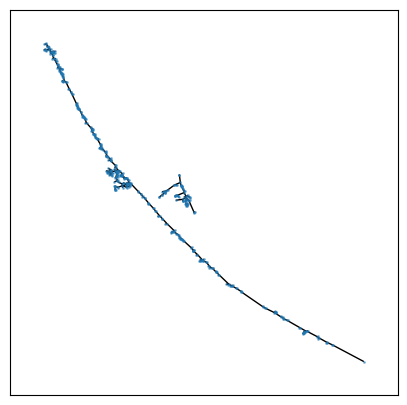

In [4]:
pts = {n : graph.nodes[n]["pts"][0] for n in graph.nodes }
pts = {n : (y, -x) for n, (x, y) in pts.items()} 

graph.remove_edges_from(nx.selfloop_edges(graph))

fig, ax = plt.subplots(figsize = (5,5)) 

nx.draw_networkx_edges(graph, pos = pts, width = 1, alpha = 1) 
nx.draw_networkx_nodes(graph, pos = pts, node_size = 1, alpha = 0.5)

# Image path

In [4]:
image_path = []

for sp in os.listdir(os.path.join("../data")):
    for boite in os.listdir(os.path.join("../data", sp)):
        for mesure in os.listdir(os.path.join("../data", sp, boite)):
            for photo in os.listdir(os.path.join("../data", sp, boite, mesure)):
                if photo.endswith("JPG") :
                    path = os.path.join("../data", sp, boite, mesure, photo)
                    image_path.append(path)

In [5]:
image_path

['../data\\gigaspora\\34\\1\\G09_10_06_P01.JPG',
 '../data\\gigaspora\\34\\1\\G09_10_06_P02.JPG',
 '../data\\gigaspora\\34\\1\\G09_10_06_P03.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P01.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P02.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P03.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P04.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P05.JPG',
 '../data\\gigaspora\\34\\2\\G09_16_06_P06.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P01.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P02.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P03.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P04.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P05.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P06.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P07.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P08.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P09.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P10.JPG',
 '../data\\gigaspora\\34\\3\\G09_23_06_P11.JPG',
 '../data\\gigaspora

# Boucle extraction

In [6]:
for path in tqdm(image_path) : 
    save_dir = os.path.dirname(path)
    graph_name = os.path.splitext(os.path.basename(path))[0]
    graph_path = os.path.join(save_dir, f"{graph_name}.pkl" )

    if os.path.exists(graph_path) :
        continue
    
    G = extract(path)
    if G is None or G.number_of_nodes() == 0 or G.number_of_edges() == 0:
        print(f"Graphe vide ou sans arêtes : {path}")
        continue

    with open(graph_path, "wb") as f :
        pickle.dump(G, f)

  1%|▊                                                                               | 6/571 [05:03<7:56:56, 50.65s/it]

Graphe vide ou sans arêtes : ../data\gigaspora\34\2\G09_16_06_P03.JPG


 76%|███████████████████████████████████████████████████████████▎                  | 434/571 [1:28:55<02:38,  1.16s/it]

Graphe vide ou sans arêtes : ../data\rhizophagus\02\4\R02_30_06_P19.JPG


 78%|█████████████████████████████████████████████████████████████                 | 447/571 [1:32:04<03:58,  1.93s/it]

Graphe vide ou sans arêtes : ../data\rhizophagus\12\1\R12_28_05_P03.JPG


100%|██████████████████████████████████████████████████████████████████████████████| 571/571 [1:35:11<00:00, 10.00s/it]

Graphe vide ou sans arêtes : ../data\rhizophagus\25\2\R25_30_06_P18.JPG


# Annotations napari

In [1]:
import napari
from skimage import io
from skimage.util import crop
import pickle
import numpy as np

C:\App\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
image = io.imread("../data/rhizophagus/09/1/R09_30_06_P01.jpg")

img = image[:, :, 1]

In [4]:
skeleton = io.imread('../notebooks/squelette.tif')

In [5]:
G = pickle.load(open('../data/rhizophagus/09/1/R09_30_06_P01.pklclean', 'rb'))

In [6]:
pts = {n : G.nodes[n]["pts"] for n in G.nodes }
pts = {n : (y, -x) for n, (x, y) in pts.items()} 

In [7]:
points = np.array([G.nodes[n]['pts'] for n in G.nodes])

edges = []
for u, v in G.edges():
    pt_u = G.nodes[u]['pts']
    pt_v = G.nodes[v]['pts']
    edges.append([pt_u, pt_v])
edges = np.array(edges)

In [9]:
viewer = napari.Viewer()

viewer.add_image(img, name = "raw image")
viewer.add_labels(skeleton, name = "skeleton")

viewer.add_points(points, name="nodes", size=10, face_color="blue", border_color="gray")
viewer.add_shapes(edges, shape_type="line", edge_color="white", edge_width=1, name="edges")

napari.run()